In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Lees de CSV-bestand in (vervang 'data.csv' met de juiste pad naar je bestand)
df = pd.read_csv('data.csv', sep=';')

# Verken de data (optioneel)
print(df.head())
print(df.info())

# Selecteer de features (X) en de target variabele (y)
X = df.drop(['HeartDisease', 'CaseNumber', 'LastName', 'PostCode'], axis=1)
y = df['HeartDisease']

# Converteer categorische kolommen naar numeriek (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)


    CaseNumber  LastName  PostCode  ...  Oldpeak ST_Slope HeartDisease
0  431-06-4243   Richard     99847  ...        0       Up            0
1  415-39-7809  Sheppard     64192  ...       10     Flat            1
2  517-18-4618    Howard     29132  ...        0       Up            0
3  634-33-8726    Taylor     12930  ...       15     Flat            1
4  151-40-1619   Mcgrath     79393  ...        0       Up            0

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CaseNumber      913 non-null    object
 1   LastName        913 non-null    object
 2   PostCode        913 non-null    int64 
 3   Age             913 non-null    int64 
 4   Sex             913 non-null    object
 5   ChestPainType   913 non-null    object
 6   RestingBP       913 non-null    int64 
 7   Cholesterol     913 non-null    int64 
 8   F

In [3]:
# Splits de data in een train- en testset (80% trainen, 20% testen)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Kies het Gradient Boosting model
model = GradientBoostingClassifier()

# Train het model
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [5]:
# Voorspel met de testdata
y_pred = model.predict(X_test)  # Voorspel met de testdata
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Krijg de voorspelde waarschijnlijkheden

# Bereken de evaluatie metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print de evaluatie metrics
print(f"Gradient Boosting - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, F1 Score: {f1:.4f}")


Gradient Boosting - Accuracy: 0.8579, ROC AUC: 0.9247, F1 Score: 0.8870


In [6]:
# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_proba
})

# Selecteer een willekeurige sample van 20 rijen
random_sample = results_df.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample)


     Actual  Predicted  Predicted Probability
72        1          1               0.858937
218       0          0               0.022750
731       0          1               0.862527
660       1          0               0.261032
518       0          1               0.557846
39        0          1               0.858233
70        1          1               0.851344
755       1          0               0.165076
559       0          0               0.045956
394       1          1               0.839931
136       0          0               0.007463
433       0          1               0.725721
888       0          0               0.154407
408       1          1               0.980328
911       1          0               0.388197
235       1          1               0.852486
578       1          1               0.988825
501       0          0               0.136526
209       1          1               0.967188
467       0          1               0.742397


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           55           16
Actual 1           10          102


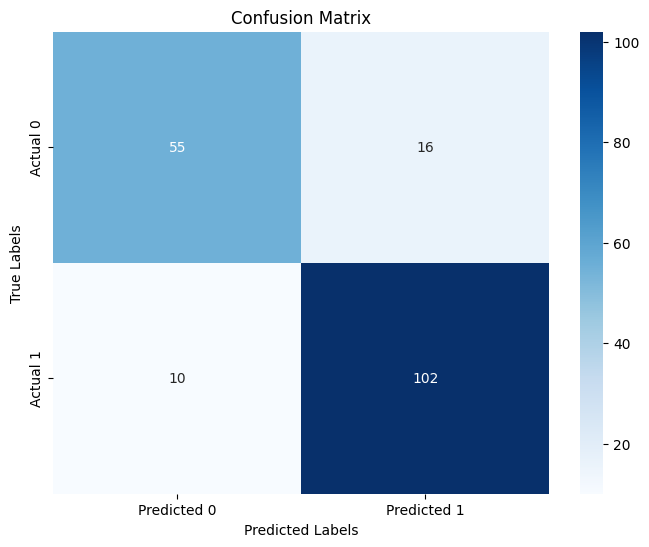

In [7]:
# Bereken de confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Zet de confusion matrix om in een DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Definieer de hyperparameters en de waarden die je wilt testen
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Configureer de GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           verbose=2)

# Voer de Grid Search uit
grid_search.fit(X_train, y_train)

# Toon de beste hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train het model met de beste hyperparameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth

In [9]:
# Maak voorspellingen met het beste model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_best = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 20 rijen
random_sample_best = results_df_best.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample_best)


     Actual  Predicted  Predicted Probability
72        1          1               0.995400
218       0          0               0.000432
731       0          1               0.958588
660       1          0               0.056694
518       0          0               0.070080
39        0          1               0.996983
70        1          1               0.965393
755       1          0               0.032419
559       0          0               0.000484
394       1          1               0.976106
136       0          0               0.000100
433       0          1               0.989481
888       0          0               0.005437
408       1          1               0.999362
911       1          0               0.003371
235       1          1               0.962860
578       1          1               0.999638
501       0          0               0.002249
209       1          1               0.997551
467       0          1               0.976080


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           59           12
Actual 1           13           99


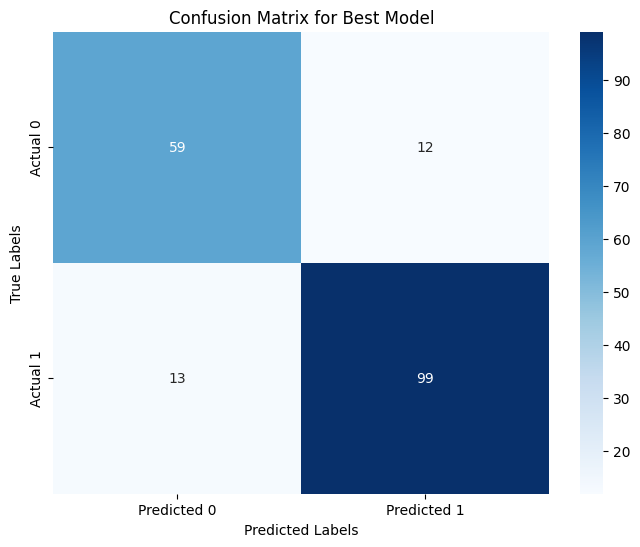

In [11]:
# Bereken de confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df_best)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
